Poniższy notebook prezentuje model ResNet50 i jego wyniki

In [1]:
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from models.cnn import resnet50
from utils.dataset import create_data_loader, get_transforms
from utils.train_eval import evaluate
import test
from torchviz import make_dot

In [2]:
model = resnet50()
model.load_state_dict(torch.load('best_model.pth'))
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [3]:
_, class_names = create_data_loader(".\\data\\val", batch_size=1, is_train=False)
print(class_names)

['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']


In [4]:
from argparse import Namespace

args = Namespace(
    test_dir=".\\data\\test",
    batch_size=32,
    model_path=".\\best_model.pth"
)
test.main(args)


Validation - Number of batches: 228
Validation: [225/228] 98.7% | Loss: 0.1255 | Acc: 0.9660
Test Loss: 0.1243, Test Accuracy: 0.9662


In [5]:
image = Image.open(".\\examplepictures\\freddie.jpg").convert('RGB')
transform = get_transforms(train=False)
input_tensor = transform(image).unsqueeze(0)
with torch.no_grad():
    output = model(input_tensor)
    probabilities = torch.nn.functional.softmax(output[0], dim=0)
    predicted_index = torch.argmax(probabilities).item()

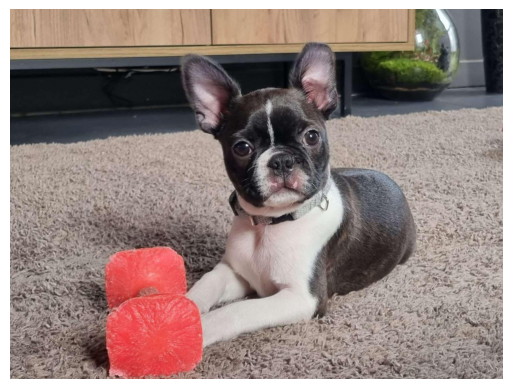

Predykcja: dog (1.00)


In [6]:
plt.imshow(np.array(image))
plt.axis('off')
plt.show()
print(f"Predykcja: {class_names[predicted_index]} ({probabilities[predicted_index]:.2f})")

In [7]:
top5_prob, top5_idx = torch.topk(probabilities, 5)
for i in range(5):
    print(f"{class_names[top5_idx[i]]}: {top5_prob[i]:.4f}")

dog: 1.0000
horse: 0.0000
sheep: 0.0000
chicken: 0.0000
cat: 0.0000


In [8]:
image2 = Image.open(".\\examplepictures\\kot.jpg").convert('RGB')
transform2 = get_transforms(train=False)
input_tensor2 = transform2(image2).unsqueeze(0)
with torch.no_grad():
    output2 = model(input_tensor2)
    probabilities2 = torch.nn.functional.softmax(output2[0], dim=0)
    predicted_index2 = torch.argmax(probabilities2).item()

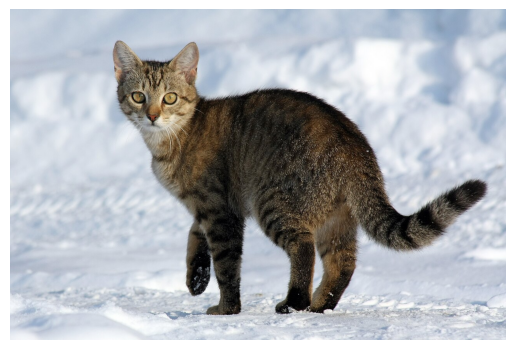

Predykcja: cat (1.00)


In [9]:
plt.imshow(np.array(image2))
plt.axis('off')
plt.show()
print(f"Predykcja: {class_names[predicted_index2]} ({probabilities2[predicted_index2]:.2f})")

In [10]:
top5_prob2, top5_idx2 = torch.topk(probabilities2, 5)
for i in range(5):
    print(f"{class_names[top5_idx2[i]]}: {top5_prob2[i]:.4f}")

cat: 1.0000
sheep: 0.0000
cow: 0.0000
dog: 0.0000
horse: 0.0000


In [11]:
x = torch.randn(1, 3, 224, 224)
y = model(x)
make_dot(y, params=dict(model.named_parameters())).render("model", format="png")

'model.png'